# Notebook to analyze output of Grid code for SU(4)
## Gather Plaquette, polyakov loop and Acceptance 
Author: Venkitesh Ayyar (vayyar@bu.edu) \
March 27, 2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [ ]:
# %matplotlib widget

In [ ]:
%matplotlib notebook

In [ ]:
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node'

fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node'

### Get Plaquette value

In [6]:
cmd="grep 'Plaq' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr1=np.array([[int(i.split('[ ')[-1].split(' ]')[0]), 
  np.float64(i.split(' ')[-1]),
  np.float64(i.split(': ')[2].split(' s')[0])] 
 for i in op])

grep 'Plaq' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node


In [7]:
cmd="grep 'Polyakov' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr2=np.array([complex(np.float64(i.split(' ')[-1][1:-1].split(',')[0]),
         np.float64(i.split(' ')[-1][1:-1].split(',')[1])) 
 for i in op ])

grep 'Polyakov' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node


In [8]:
cmd="grep 'Total time for trajectory' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr3=[np.float32(i.split(': ')[-1]) for i in op]

grep 'Total time for trajectory' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node


In [9]:
lgth=min(len(arr1),len(arr2),len(arr3))
print(lgth)

44


In [11]:
cmd="grep 'Metropolis_test' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
# print(op[0])

arr_temp=[1 if (i.split(' ')[-1]=='ACCEPTED') else 0 for i in op] # Accept =1 , Reject = 0
skip=lgth-len(arr_temp)
print("skip",skip)
arr_skip=[np.nan for i in range(skip)]
arr4=np.array(arr_skip+arr_temp)


grep 'Metropolis_test' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/run3_hsdm/SDM.4node
skip 10


In [13]:
cols=['iter','Plaquette','Polyakov','Traj_time','Accept','Plaq_epoch']
df=pd.DataFrame(columns=cols)

df['Plaquette']=arr1[:,1]
df['Plaq_epoch']=arr1[:,2]
df['iter']=arr1[:,0].astype(int)
df['Polyakov']=arr2
df['Traj_time']=arr3
df['Accept']=arr4


In [14]:
df

,iter,Plaquette,Polyakov,Traj_time,Accept,Plaq_epoch
0,1,0.689535,0.217050-0.001599j,648.586975,NaN,655.940409
1,2,0.658623,0.153649+0.003100j,646.539001,NaN,1302.721255
2,3,0.636843,0.114278+0.001041j,647.181030,NaN,1950.141048
3,4,0.620367,0.091262+0.005114j,645.450012,NaN,2595.830295
4,5,0.609019,0.086590+0.000787j,648.281006,NaN,3244.351297
5,6,0.601501,0.076622+0.003295j,647.163025,NaN,3892.657119
6,7,0.595258,0.068271+0.001768j,646.494995,NaN,4539.391024
7,8,0.590866,0.065629+0.000394j,647.596985,NaN,5187.226577
8,9,0.587257,0.057619-0.003208j,646.562012,NaN,5834.283780
9,10,0.584669,0.055826-0.001310j,646.585022,NaN,6480.852693


## Plot Plaquette

<IPython.core.display.Javascript object>


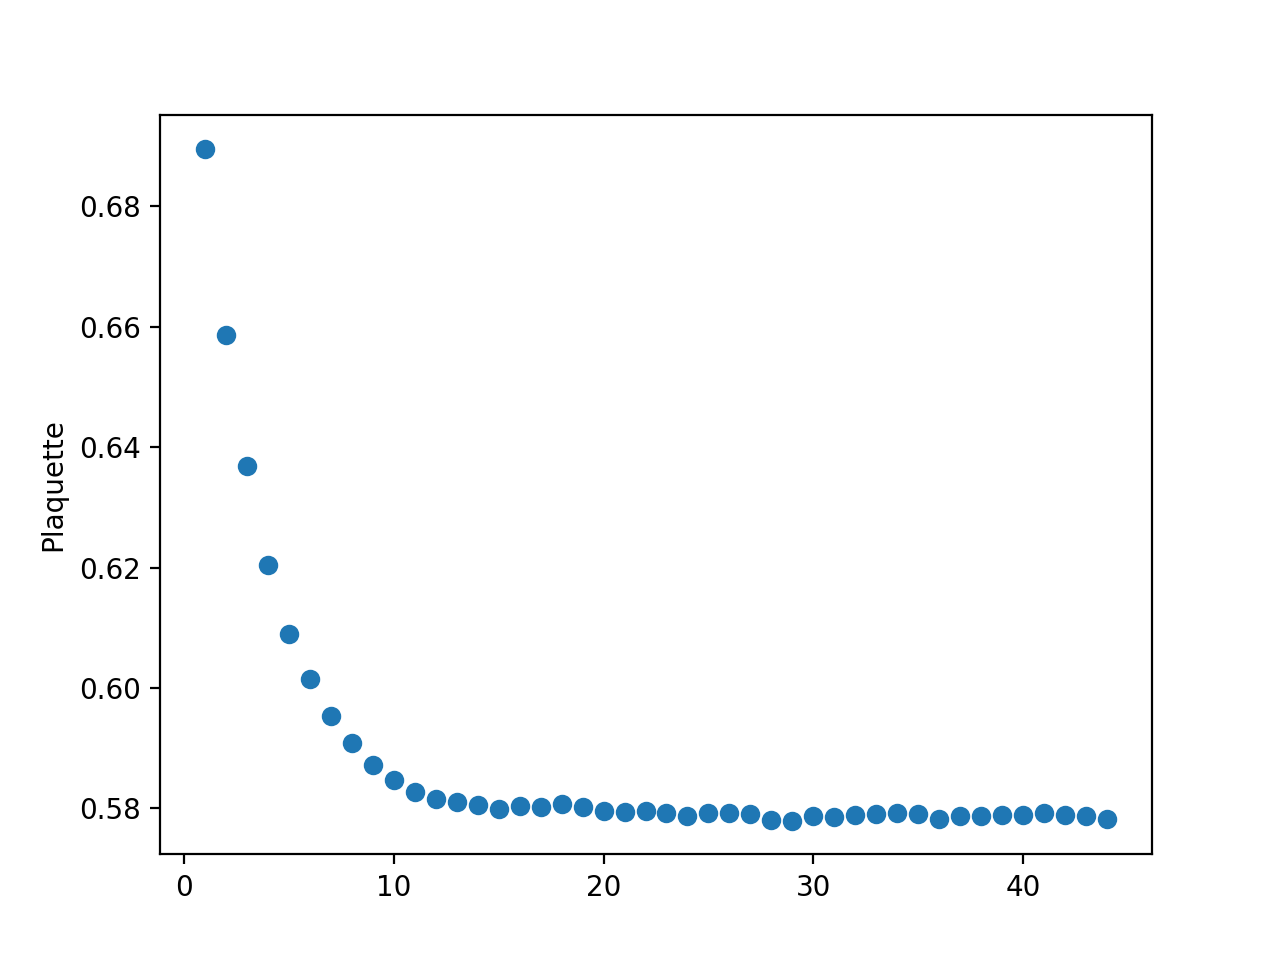

In [15]:
plt.figure()
x=df.iter.values
y=df.Plaquette.values
# y=df.Traj_time.values

plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
plt.show()

### Plot Polyakov loop

<IPython.core.display.Javascript object>


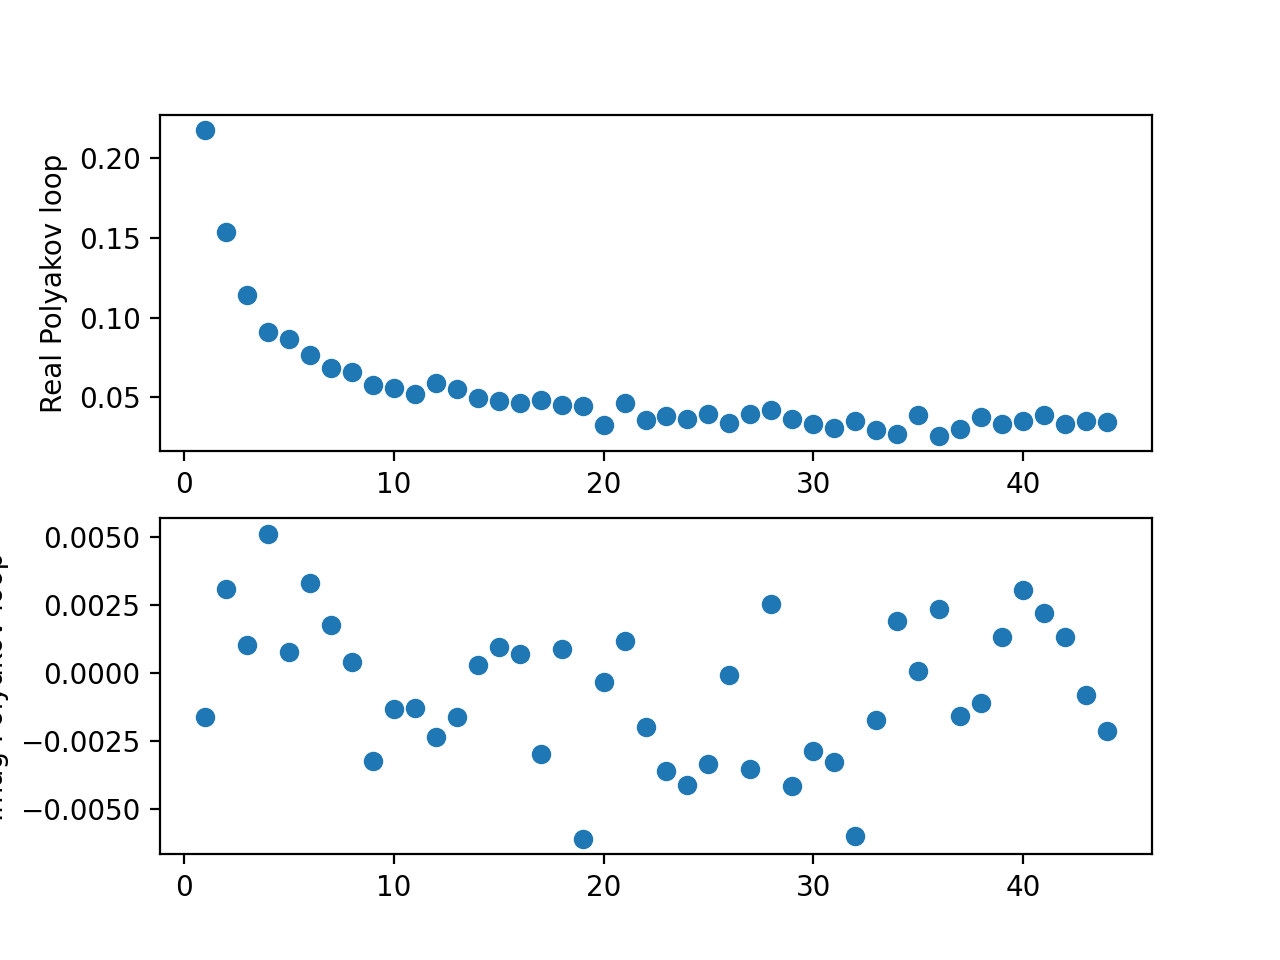

In [18]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values
fig.add_subplot(2,1,1)

plt.plot(x,y.real,marker='o',linestyle='')
plt.ylabel('Real Polyakov loop')

fig.add_subplot(2,1,2)

plt.plot(x,y.imag,marker='o',linestyle='')
plt.ylabel('Imag Polyakov loop')
plt.show()


<IPython.core.display.Javascript object>


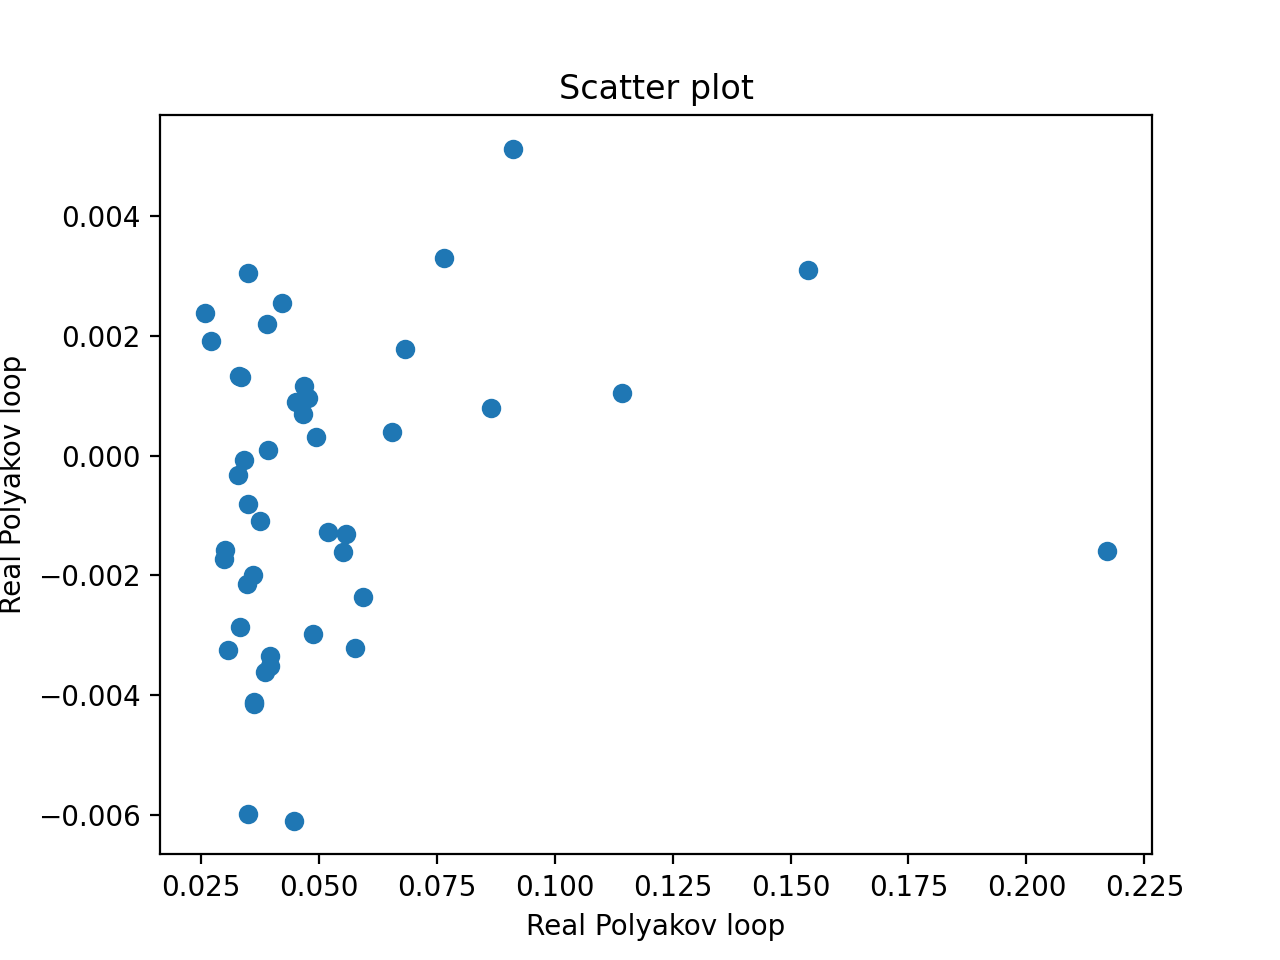

In [20]:
fig=plt.figure()
x=df.iter.values
y=df.Polyakov.values

y1=y.real
y2=y.imag

plt.scatter(y1,y2)
plt.xlabel('Real Polyakov loop')
plt.ylabel('Real Polyakov loop')
plt.title("Scatter plot")
plt.show()

### Plot acceptance

<IPython.core.display.Javascript object>


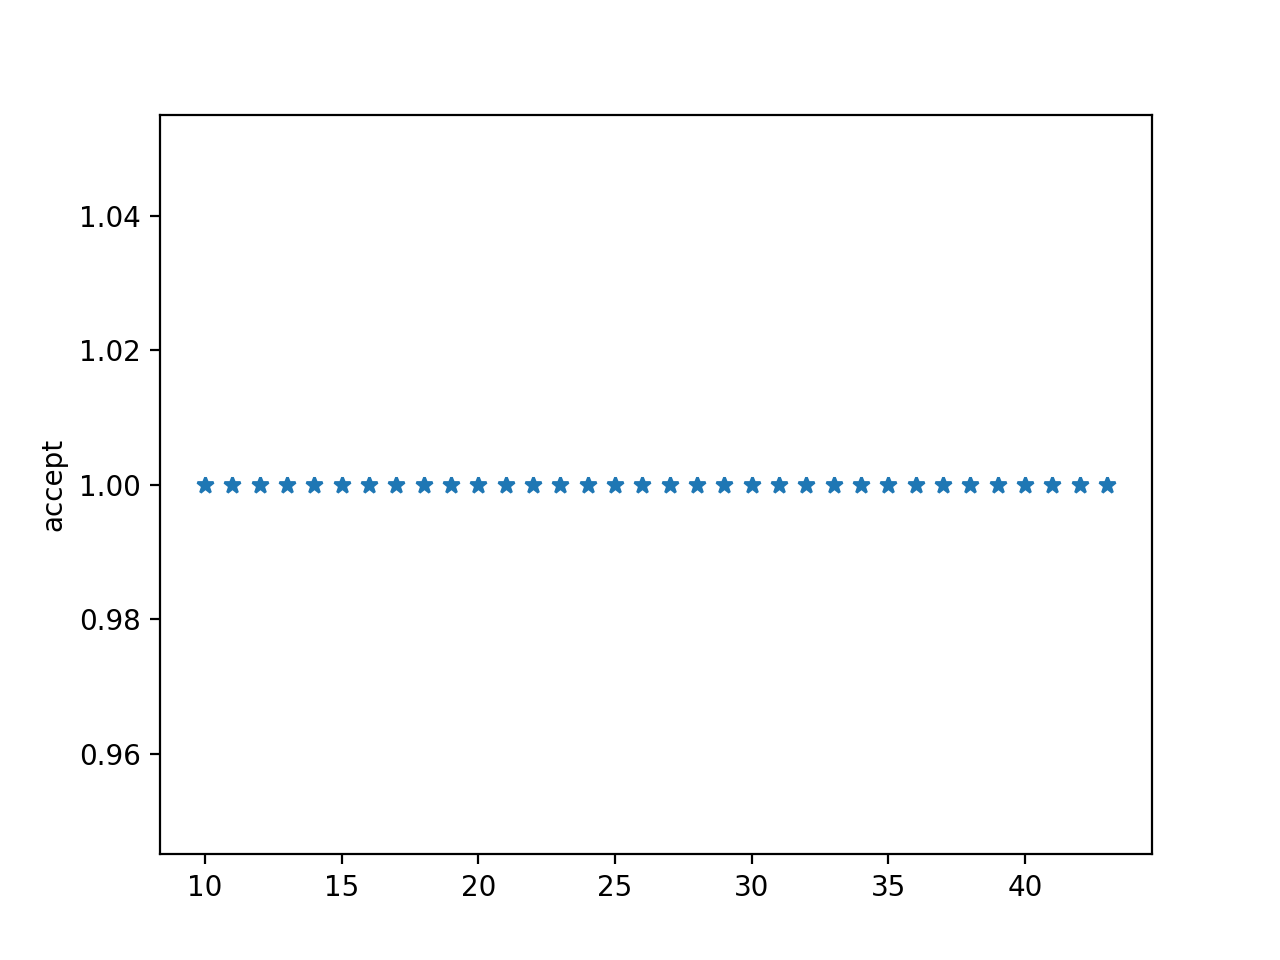

In [21]:
plt.figure()
x=df.iter.values
y=df.Accept.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [ ]:
# Print Acceptance ratio
ct=df['val'].value_counts()
print(ct)

Act=ct[1]
Rft=ct[0]
print(Act* 100 /(Act+Rft),'%')